In [2]:
import sys
sys.path.append('..')  # Adds the parent directory to Python path

# Import the data loader from your src folder
from src.data_loader import load_data

In [3]:
# Load data with preprocessing and augmentation
train_loader, test_loader = load_data(batch_size=64, data_augmentation=True)

# Check the shapes of images and labels from the train loader
images, labels = next(iter(train_loader))
print(f"Batch of images shape: {images.shape}")
print(f"Batch of labels: {labels.shape}")

Files already downloaded and verified
Files already downloaded and verified
Batch of images shape: torch.Size([64, 3, 32, 32])
Batch of labels: torch.Size([64])


In [4]:
# Display a sample batch of images to confirm preprocessing
import matplotlib.pyplot as plt

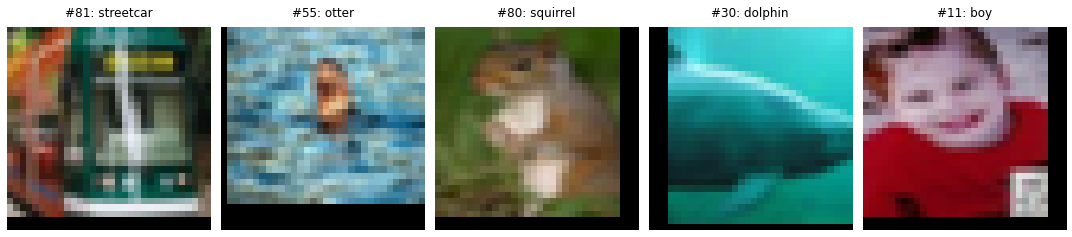

In [6]:
def show_batch(images, labels):
    # CIFAR-100 class names
    CIFAR100_CLASSES = [
        'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
        'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
        'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
        'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
        'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
        'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
        'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket',
        'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider',
        'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor',
        'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
    ]
    
    # Undo normalization for visualization
    CIFAR100_MEAN = (0.5071, 0.4867, 0.4408)
    CIFAR100_STD = (0.2675, 0.2565, 0.2761)
    images = images.clone()
    for i, (mean, std) in enumerate(zip(CIFAR100_MEAN, CIFAR100_STD)):
        images[:, i, :, :] = images[:, i, :, :] * std + mean

    fig, axes = plt.subplots(1, len(images), figsize=(15, 5))
    for img, label, ax in zip(images, labels, axes):
        ax.imshow(img.permute(1, 2, 0))
        label_num = label.item()
        class_name = CIFAR100_CLASSES[label_num]
        ax.set_title(f"#{label_num}: {class_name}", pad=10)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Visualize a few images
show_batch(images[:5], labels[:5])

In [7]:
import pandas as pd

# Load test.csv to inspect its structure
test_df = pd.read_csv('../data/test.csv')
print(f"Shape of test.csv: {test_df.shape}")
print(test_df.head())

Shape of test.csv: (10000, 3073)
   ID   pixel_1   pixel_2   pixel_3   pixel_4   pixel_5   pixel_6   pixel_7  \
0   0 -1.474270 -1.471011 -1.388761 -1.155942 -0.803701 -0.631944 -0.539918   
1   1 -1.895701 -1.895701 -1.895701 -1.895701 -1.895701 -1.895701 -1.895701   
2   2 -0.107172 -0.033872 -0.019212 -0.019212 -0.019212 -0.019212 -0.019212   
3   3 -1.118717 -1.074737 -0.063192  0.523211 -0.033872 -1.206678 -1.133377   
4   4 -1.895701 -1.895701 -1.895701 -1.895701 -1.895701 -1.895701 -1.895701   

    pixel_8   pixel_9  ...  pixel_3063  pixel_3064  pixel_3065  pixel_3066  \
0 -0.495398 -0.430018  ...   -0.762173   -0.675418   -0.627466   -0.623803   
1 -1.895701 -1.895701  ...   -0.826936   -0.745904   -0.641802   -0.675757   
2 -0.048532 -0.077852  ...   -1.014182   -0.914758   -0.914758   -1.056793   
3 -0.048532  0.039428  ...   -0.133569    0.505586    0.960095    0.178906   
4 -1.895701 -1.895701  ...   -1.596523   -1.596523   -1.596523   -1.596523   

   pixel_3067  pixel_30

In [12]:
import sys
sys.path.append('..')
from src.predict import predict_and_save

In [13]:
# Load a dummy model (replace with your trained model)
import torch.nn as nn

class DummyModel(nn.Module):
    def __init__(self):
        super(DummyModel, self).__init__()
        self.fc = nn.Linear(32 * 32 * 3, 100)  # Dummy fully connected layer

    def forward(self, x):
        return self.fc(x.view(x.size(0), -1))  # Flatten and pass through FC layer

# Replace this with your actual trained model
model = DummyModel()

In [20]:
# Path to test.csv and desired submission output
test_csv_path = '../data/test.csv'
submission_path = '../outputs/predictions/submission.csv'

# Generate predictions and save submission file
predict_and_save(model, test_csv_path, submission_path)

Submission saved to ../outputs/predictions/submission.csv


In [21]:
import pandas as pd

submission_df = pd.read_csv('../outputs/predictions/submission.csv')
print(submission_df.head())
print(f"Number of rows: {submission_df.shape[0]}")


   ID  LABEL
0   0     13
1   1      1
2   2     13
3   3     13
4   4     96
Number of rows: 10000


In [23]:
# Confirm that the LABEL column contains valid class indices (0-99).
print(submission_df['LABEL'].unique())

[13  1 96 68 49 36 63 42 38 75 90 77 71 74 67 93  2 57  5 56 17 91 62  8
 80 46 34 11 84 19 72 82 43 65 98 83 53 99 73 69 94 45 39 20 22 40 87 15
 60 41  6 54 26 78 48 14 16 44 28 55 31  9 27 64 51 79 66  3 18 12  0 35
 24 70  4 37  7 58 32 29 50 23 97 59 21 25 85 88 61 33 47 89 76 92 95 10
 30 52 81 86]
